In [1]:
pip install opencv-python

     |████████████████████████████████| 60.5 MB 48 kB/s  eta 0:00:01    |█▎                              | 2.4 MB 1.2 MB/s eta 0:00:48     |████▏                           | 7.8 MB 1.1 MB/s eta 0:00:47     |████████▉                       | 16.6 MB 1.3 MB/s eta 0:00:34     |█████████████████████████████▏  | 55.2 MB 1.9 MB/s eta 0:00:03     |█████████████████████████████▉  | 56.4 MB 2.3 MB/s eta 0:00:02     |███████████████████████████████▉| 60.2 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 2.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install IPython

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import Image
cv2.__version__
%matplotlib inline

In [35]:
image = cv2.imread('girl.jpeg',)
image

array([[[137, 125, 147],
        [137, 125, 147],
        [137, 125, 147],
        ...,
        [154, 141, 163],
        [154, 141, 163],
        [154, 141, 163]],

       [[137, 125, 147],
        [137, 125, 147],
        [137, 125, 147],
        ...,
        [154, 141, 163],
        [154, 141, 163],
        [154, 141, 163]],

       [[137, 125, 147],
        [137, 125, 147],
        [137, 125, 147],
        ...,
        [154, 141, 163],
        [154, 141, 163],
        [154, 141, 163]],

       ...,

       [[156, 143, 165],
        [156, 143, 165],
        [157, 144, 166],
        ...,
        [180, 167, 189],
        [180, 167, 189],
        [180, 167, 189]],

       [[156, 143, 165],
        [156, 143, 165],
        [157, 144, 166],
        ...,
        [180, 167, 189],
        [180, 167, 189],
        [180, 167, 189]],

       [[156, 143, 165],
        [156, 143, 165],
        [157, 144, 166],
        ...,
        [180, 167, 189],
        [180, 167, 189],
        [180, 167, 189]]

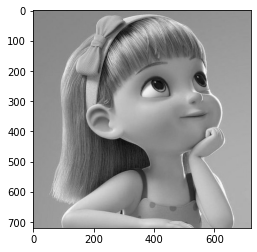

In [28]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[133, 133, 133, ..., 149, 149, 149],
       [133, 133, 133, ..., 149, 149, 149],
       [133, 133, 133, ..., 149, 149, 149],
       ...,
       [151, 151, 152, ..., 175, 175, 175],
       [151, 151, 152, ..., 175, 175, 175],
       [151, 151, 152, ..., 175, 175, 175]], dtype=uint8)

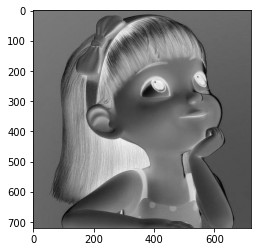

In [30]:
negative = 255 - img
plt.imshow(negative)

In [31]:
blured = cv2.GaussianBlur(negative,(21,21),0)
blured

array([[[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [106, 106, 106]],

       [[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       ...,

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]]

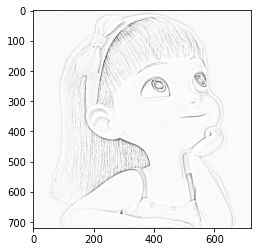

In [32]:
def dodge_img(x,y):
    return cv2.divide(x,255-y,scale=250)
dodged_img = dodge_img(img,blured)
plt.imshow(dodged_img)

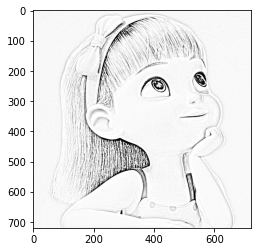

In [33]:
def burn_img(image,mask):
    return 255- (cv2.divide(255-image,255-mask,scale=200))
final_image=burn_img(dodged_img,blured)
plt.imshow(final_image)

In [34]:
cv2.imwrite('girl-b&w.jpeg',final_image)

True